(a) Use the MNIST dataset for training and testing the neural network model with
following architecture [#input, 256, 128, 64, #output], learning rate=0.1, and
number of epochs=100. Save the weights of the trained model and report the test
accuracy 

In [147]:
# "Sequential" model lets us to define a stack of neural network layers
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
# import the "core" layers:
from keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras import regularizers
from keras.regularizers import l2

from keras.optimizers import Adam, SGD

# CNN
from keras.layers import Convolution2D, MaxPooling2D

# import some utilities to transform our data
from keras.utils import np_utils
import tensorflow as tf
from tensorflow import keras
import numpy as np

from tensorflow.keras import layers

%matplotlib inline

import matplotlib.pyplot as plt
%matplotlib inline

In [148]:
# download MNIST dataset from Keras
from keras.datasets import fashion_mnist

In [149]:
# load and store the data as train and test datasets
 
  # train_image = X_train 
  # train_label = y_train 

  # test_image = X_test
  # test_label = y_test

(train_image, train_label), (test_image, test_label) = fashion_mnist.load_data()

In [150]:
# shape

print(train_image.shape)
print(test_image.shape)

(60000, 28, 28)
(10000, 28, 28)


In [151]:
#reshape the image matrix for both train and test datsets

#train_image = train_image.reshape(train_image.shape[0], 784)
#test_image = test_image.reshape(test_image.shape[0], 784)

#train_image = train_image.astype('float32')
#test_image = test_image.astype('float32')

#print("Training matrix shape", train_image.shape)
#print("Testing matrix shape", test_image.shape)

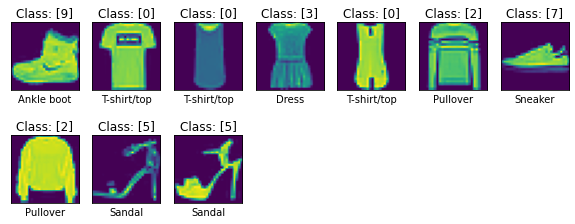

In [152]:
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(10):

  plt.subplot(5,7, i+1)
  plt.xticks([])

  plt.yticks([])
  plt.title('Class: {}'.format(train_label[[i]]))
  
  plt.grid(False)
  plt.imshow(train_image[i])
  plt.xlabel(class_name[train_label[i]])

In [153]:
# data normalization i.e. for the image matrix for both train and test datsets
# pixel values are from 0 to 255

train_image = train_image / 255.0
test_image = test_image / 255.0

In [154]:
# Build NN model- architecture [#input, 256, 128, 64, #output] 

# Activation function is relu

# step 1- 5 layered NN architechture
model_NN5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_NN5.summary() 


# step 2- Compile 
opt = Adam()
model_NN5.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# step 3- Train the model 100 epochs
history_NN5 = model_NN5.fit(train_image, train_label, epochs=100, validation_split=0.2)


# step 4- Evaluate 
test_loss, test_accuracy = model_NN5.evaluate(test_image, test_label)


# step 5- predict
#Predict the test results
pred = model_NN5.predict_classes(test_image)
pred_length = len(pred)
y_label = np.array(test_label)
pred_label = np.array(pred)

#confusion matrix and classification report
print('\nConfusion Matrix\n',confusion_matrix(y_label, pred_label))
print('\nClassification Report\n',classification_report(y_label, pred_label))
print('\nAccuracy : ',accuracy_score(y_label, pred_label)*100)

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_31 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_116 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_117 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_118 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_119 (Dense)            (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5046 - accuracy: 0.8156 - val_loss

#Test Accuracy :  88.91 %

In [157]:
#predict for first 10 images from test set
prob = model_NN5.predict(test_image[:10])
pred = np.argmax(prob, axis=1)

#comparision between labels to cross check the results
print("Original  labels: ", test_label[:10])
print("Predicted labels: ", pred)

Original  labels:  [9 2 1 1 6 1 4 6 5 7]
Predicted labels:  [9 2 1 1 0 1 4 6 5 7]


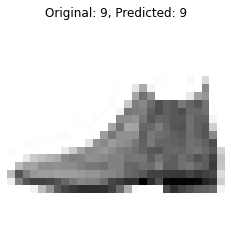

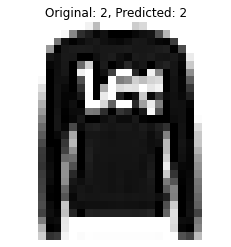

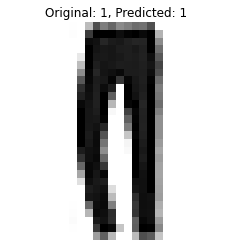

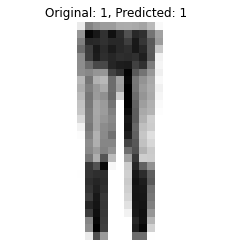

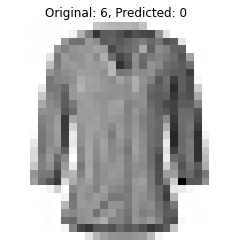

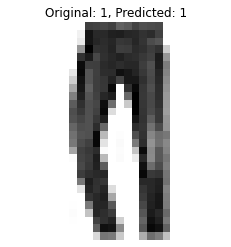

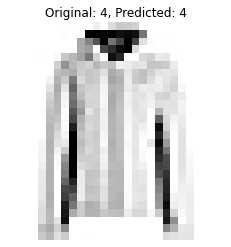

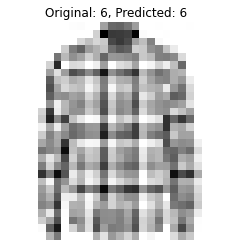

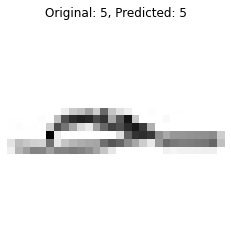

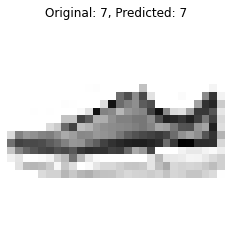

<Figure size 432x288 with 0 Axes>

In [158]:
# Visualizing the result for the first 10 images from test set
for i in range(10):
  plt.imshow(test_image[i], cmap="binary")
  plt.title('Original: {}, Predicted: {}'.format(test_label[i], pred[i]))
  plt.axis("Off")
  plt.figure()

(b) Implement the following activation functions: ReLU, sigmoid, linear and tanh
and plot training error vs epoch curve and testing error vs epoch curve for each of the functions used

## Acitvation function = relu


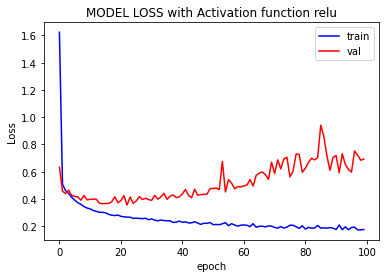

In [135]:
# Acitvation function = relu

#Plot loss results 
plt.plot(history_NN5.history['loss'], 'blue')
plt.plot(history_NN5.history['val_loss'], 'red')
plt.title('MODEL LOSS with Activation function relu')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

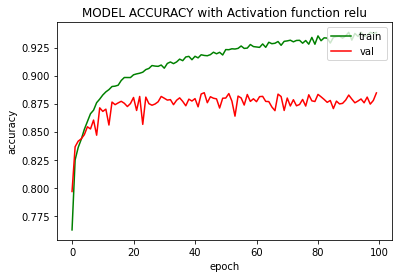

In [136]:
# Acitvation function = relu

#Plot accuracy results 
plt.plot(history_NN5.history['accuracy'], 'green')
plt.plot(history_NN5.history['val_accuracy'], 'red')
plt.title('MODEL ACCURACY with Activation function relu')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

# Activation function is sigmoid


In [137]:
# Build NN model- architecture [#input, 256, 128, 64, #output] 

# Activation function is sigmoid

# step 1- 5 layered NN architechture
model_NN5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tf.nn.sigmoid),
    keras.layers.Dense(128, activation=tf.nn.sigmoid),
    keras.layers.Dense(64, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_NN5.summary() 


# step 2- Compile 
opt = SGD()
model_NN5.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# step 3- Train the model 100 epochs
history_NN5 = model_NN5.fit(train_image, train_label, epochs=100, validation_split=0.2)


# step 4- Evaluate 
test_loss, test_accuracy = model_NN5.evaluate(test_image, test_label)


# step 5- predict
#Predict the test results
pred = model_NN5.predict_classes(test_image)
pred_length = len(pred)
y_label = np.array(test_label)
pred_label = np.array(pred)

#confusion matrix and classification report
print('\nConfusion Matrix\n', confusion_matrix(y_label, pred_label))
print('\nClassification Report\n', classification_report(y_label, pred_label))
print('\nAccuracy :', accuracy_score(y_label, pred_label)*100)

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_28 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_104 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_105 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_106 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_107 (Dense)            (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1500/1500 [==============================] - 5s 3ms/step - loss: 1.9590 - accuracy: 0.4901 - val_loss

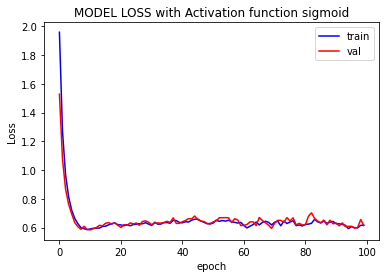

In [138]:
# Acitvation function = sigmoid

#Plot loss results 
plt.plot(history_NN5.history['loss'], 'blue')
plt.plot(history_NN5.history['val_loss'], 'red')
plt.title('MODEL LOSS with Activation function sigmoid')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

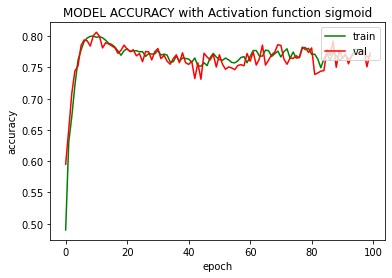

In [139]:
# Acitvation function = sigmoid

#Plot accuracy results 
plt.plot(history_NN5.history['accuracy'], 'green')
plt.plot(history_NN5.history['val_accuracy'], 'red')
plt.title('MODEL ACCURACY with Activation function sigmoid')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

## Activation function is Linear


In [140]:
# Build NN model- architecture [#input, 256, 128, 64, #output] 

# Activation function is Linear

#reshape the image matrix for both train and test datsets

train_image = train_image.reshape(train_image.shape[0], 784)
test_image = test_image.reshape(test_image.shape[0], 784)

train_image = train_image.astype('float32')
test_image = test_image.astype('float32')

#print("Training image matrix shape", train_image.shape)
#print("Testing image matrix shape", test_image.shape)

# dictionary from the given dataset
label_dict = {0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle boot"}

# list of classes
class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 1D class array to 10D class matrices with the help of one-hot encoding
Y_train = np_utils.to_categorical(train_label, 10)
Y_test = np_utils.to_categorical(test_label, 10)


# step 1- 5 layered NN architechture

#declare a model
model_NN5 = Sequential() 

#add layers
model_NN5.add(Dense(256, input_shape=(784,))) 
model_NN5.add(Activation('linear')) 
model_NN5.add(Dropout(0.2)) 

model.add(Dense(128)) 
model_NN5.add(Activation('linear'))
model_NN5.add(Dropout(0.2))

model_NN5.add(Dense(64)) 
model_NN5.add(Activation('linear'))
model_NN5.add(Dropout(0.2))

model_NN5.add(Dense(10)) 
model_NN5.add(Activation('linear'))  

model_NN5.summary() 


# step 2- Compile 
opt = SGD()
model_NN5.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


# step 3- Train the model 100 epochs
filepath="mlp-weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history_NN5 = model_NN5.fit(train_image, 
                    Y_train,
                    batch_size=128, 
                    epochs=100,
                    verbose=1,
                    validation_data=(test_image,Y_test))

# step 4- Evaluate 
#test_loss, test_accuracy = model_NN5.evaluate(test_image, test_label)


# step 5- predict
#Predict the test results
pred = model_NN5.predict_classes(test_image)
pred_length = len(pred)
y_label = np.array(test_label)
pred_label = np.array(pred)

#confusion matrix and classification report
print('\nConfusion Matrix\n', confusion_matrix(y_label, pred_label))
print('\nClassification Report\n', classification_report(y_label, pred_label))
print('\nAccuracy : ', accuracy_score(y_label, pred_label)*100)

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_58 (Dense)             (None, 256)               200960    
_________________________________________________________________
activation_55 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 256)               0         
_________________________________________________________________
activation_56 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_43 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 64)                16448     
_________________________________________________________________
activation_57 (Activation)   (None, 64)              

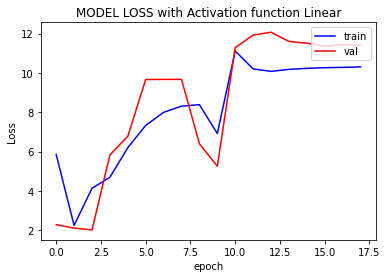

In [141]:
# Acitvation function = Linear
#Plot loss results 
plt.plot(history_NN5.history['loss'], 'blue')
plt.plot(history_NN5.history['val_loss'], 'red')
plt.title('MODEL LOSS with Activation function Linear')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

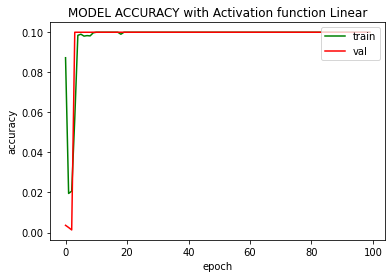

In [142]:
# Acitvation function = Linear
#Plot accuracy results 
plt.plot(history_NN5.history['accuracy'], 'green')
plt.plot(history_NN5.history['val_accuracy'], 'red')
plt.title('MODEL ACCURACY with Activation function Linear')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

# Activation function is tanh


In [143]:
# Build NN model- architecture [#input, 256, 128, 64, #output] 

# Activation function is tanh

# step 1- 5 layered NN architechture
model_NN5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256, activation=tf.nn.tanh),
    keras.layers.Dense(128, activation=tf.nn.tanh),
    keras.layers.Dense(64, activation=tf.nn.tanh),
    keras.layers.Dense(10, activation=tf.nn.tanh)
])
model_NN5.summary() 


# step 2- Compile 
opt = Adam()
model_NN5.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# step 3- Train the model 100 epochs
history_NN5 = model_NN5.fit(train_image, train_label, epochs=100, validation_split=0.2)


# step 4- Evaluate 
test_loss, test_accuracy = model_NN5.evaluate(test_image, test_label)


# step 5- predict
#Predict the test results
pred = model_NN5.predict_classes(test_image)
pred_length = len(pred)
y_label = np.array(test_label)
pred_label = np.array(pred)

#confusion matrix and classification report
print('\nConfusion Matrix\n', confusion_matrix(y_label, pred_label))
print('\nClassification Report\n', classification_report(y_label, pred_label))
print('\nAccuracy : ', accuracy_score(y_label, pred_label)*100)

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_29 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 256)               200960    
_________________________________________________________________
dense_109 (Dense)            (None, 128)               32896     
_________________________________________________________________
dense_110 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_111 (Dense)            (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3632 - accuracy: 0.1151 - val_loss

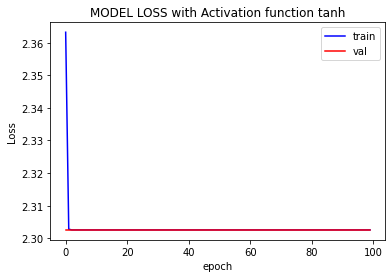

In [144]:
# Acitvation function = tanh
#Plot loss results 
plt.plot(history_NN5.history['loss'], 'blue')
plt.plot(history_NN5.history['val_loss'], 'red')
plt.title('MODEL LOSS with Activation function tanh')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

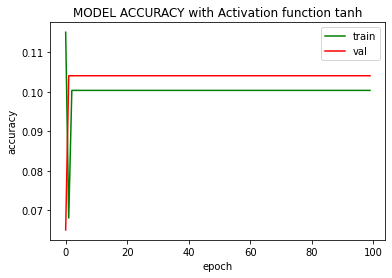

In [145]:
# Acitvation function = tanh
#Plot accuracy results 
plt.plot(history_NN5.history['accuracy'], 'green')
plt.plot(history_NN5.history['val_accuracy'], 'red')
plt.title('MODEL ACCURACY with Activation function tanh')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

#OVERALL Result:

Relu is a better activation function for the above classification problem. 

Next being the Sigmoid activation function. 

(Since, Accuracy of the Model with Relu is more than the Accuracy of the Model with Sigmoid activation function)

Appropriate optimizer should be used w.r.t. the activation function being used.